<a href="https://colab.research.google.com/github/Aditya3392/Python_MachineLearning/blob/main/CNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

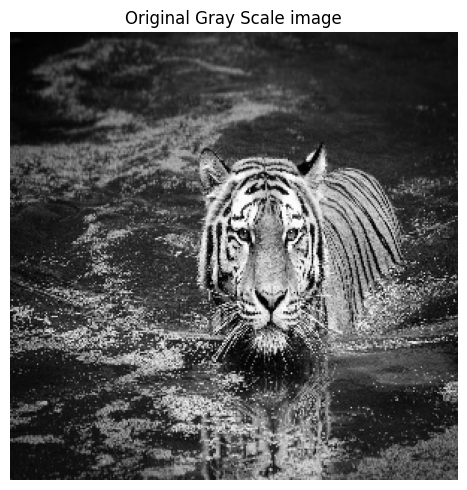

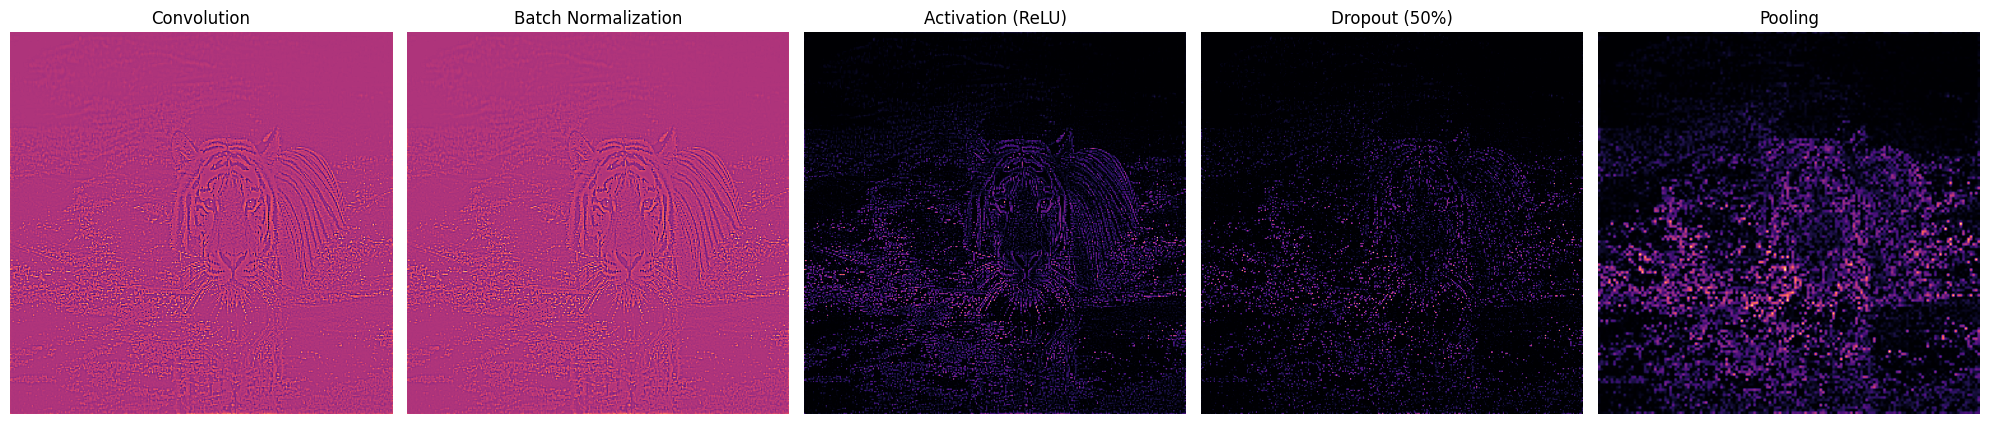

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])

# load the image
image = tf.io.read_file('/content/tiger-jpg.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

# Batch Normalization layer
bn_layer = tf.keras.layers.BatchNormalization()
normalized_image = bn_layer(image_filter, training=True)

# Activation layer (ReLU)
relu_fn = tf.nn.relu
image_detect = relu_fn(normalized_image)

# Dropout layer
dropout_layer = tf.keras.layers.Dropout(0.5)
dropped_image = dropout_layer(image_detect, training=True)

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=dropped_image,
                      window_shape=(2, 2),
                      pooling_type='MAX',
                      strides=(2, 2),
                      padding='SAME',
                     )

# Softmax layer (assuming it's used for classification)
num_classes = 10  # Example number of classes
softmax_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
output = softmax_layer(tf.keras.layers.Flatten()(image_condense))

# Display the processed image after convolution, Batch Normalization, ReLU, Dropout, and Pooling layers
plt.figure(figsize=(20, 5))

# Plot the convolved image
plt.subplot(1, 5, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Plot the Batch Normalization output
plt.subplot(1, 5, 2)
plt.imshow(tf.squeeze(normalized_image))
plt.axis('off')
plt.title('Batch Normalization')

# Plot the ReLU output
plt.subplot(1, 5, 3)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation (ReLU)')

# Plot the Dropout output
plt.subplot(1, 5, 4)
plt.imshow(tf.squeeze(dropped_image))
plt.axis('off')
plt.title('Dropout (50%)')

# Plot the Pooled output
plt.subplot(1, 5, 5)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()
